In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("D:\\3rd sem\hepatitis_csv.csv")

In [5]:
#understanding the data

In [6]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [8]:
data.tail()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live
154,43,female,True,False,True,False,False,True,False,True,True,True,False,1.2,100.0,19.0,3.1,42.0,True,die


In [9]:
data.shape

(155, 20)

In [10]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [12]:
# For the above we can see that there are only 6 columns contains a numerical features, whose mean values, standard deviation values are shown in the above table

In [13]:
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [14]:
# To check the unique values in the dataset
data.nunique()

age                49
sex                 2
steroid             2
antivirals          2
fatigue             2
malaise             2
anorexia            2
liver_big           2
liver_firm          2
spleen_palpable     2
spiders             2
ascites             2
varices             2
bilirubin          34
alk_phosphate      83
sgot               84
albumin            29
protime            44
histology           2
class               2
dtype: int64

In [15]:
data['class'].unique()

array(['live', 'die'], dtype=object)

In [16]:
#cleaning the dataset

In [17]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

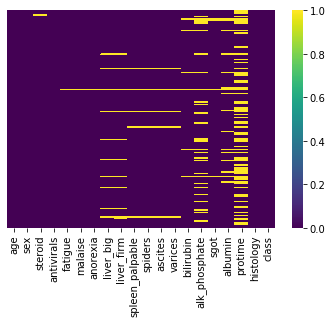

In [20]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [80]:
# handling missing values replacing mean
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy = 'mean',axis = 0)
imputer= imputer.fit(data.iloc[:, 13:18])
data.iloc[:, 13:18]=imputer.transform(data.iloc[:, 13:18])

C:\Users\ELCOT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
#handling missing values by mode for categorical data.
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy = 'most_frequent',axis = 0)
imputer= imputer.fit(data.iloc[:, 2:13])
data.iloc[:, 2:13]=imputer.transform(data.iloc[:, 2:13])

C:\Users\ELCOT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [86]:
data.isnull().sum()

age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
class              0
dtype: int64

In [87]:
#relationship analysis between the variables

In [91]:
corr = data.corr()
corr

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,-0.090466,0.013100,0.278701,0.117876,-0.088317,-0.089629,0.092001,0.061277,0.156545,0.055314,0.039229,0.122884,0.008076,0.081052,-0.246169,-0.153312,0.170780
steroid,-0.090466,1.000000,-0.043961,-0.175451,-0.240139,-0.073644,0.201478,-0.068376,-0.074816,-0.027290,0.031046,0.073548,-0.052804,-0.044223,-0.044154,0.216697,0.083434,-0.095367
antivirals,0.013100,-0.043961,1.000000,-0.061339,-0.016251,-0.042072,-0.054746,0.099213,-0.164548,-0.147909,-0.164747,-0.155148,-0.181179,-0.197594,-0.107876,0.165443,0.027317,-0.209242
fatigue,0.278701,-0.175451,-0.061339,1.000000,0.589030,0.372957,-0.099759,0.247505,0.186846,0.367948,0.281439,0.180511,0.273577,0.148708,0.199808,-0.311757,-0.208021,0.146579
malaise,0.117876,-0.240139,-0.016251,0.589030,1.000000,0.600545,-0.041697,0.091832,0.006470,0.307173,0.320228,0.161422,0.294889,0.194920,0.202801,-0.290698,-0.200760,0.144667
anorexia,-0.088317,-0.073644,-0.042072,0.372957,0.600545,1.000000,-0.079685,0.052781,0.032536,0.287366,0.184053,0.163378,0.298034,0.153634,0.234824,-0.155587,-0.045235,0.081623
liver_big,-0.089629,0.201478,-0.054746,-0.099759,-0.041697,-0.079685,1.000000,-0.479779,-0.095959,-0.215566,0.116465,0.049453,0.008299,-0.124201,0.050390,-0.057149,-0.071565,-0.060262
liver_firm,0.092001,-0.068376,0.099213,0.247505,0.091832,0.052781,-0.479779,1.000000,0.180607,0.345553,0.010196,0.208047,0.038876,0.323892,0.092868,-0.174551,-0.026348,0.157118
spleen_palpable,0.061277,-0.074816,-0.164548,0.186846,0.006470,0.032536,-0.095959,0.180607,1.000000,0.282523,0.103709,0.230190,0.200316,0.257316,-0.017947,-0.216003,-0.115620,0.211702
spiders,0.156545,-0.027290,-0.147909,0.367948,0.307173,0.287366,-0.215566,0.345553,0.282523,1.000000,0.303888,0.389041,0.265227,0.263893,0.078187,-0.290618,-0.217816,0.357796


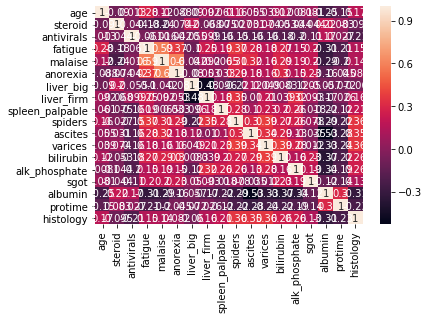

In [89]:
sns.heatmap(corr,xticklabels = corr.columns, yticklabels = corr.columns,annot = True)

In [100]:
#label encoding for the categorical variable
from sklearn.preprocessing import LabelEncoder
labelenc= LabelEncoder()
data['sex'] = labelenc.fit_transform(data['sex'])
data['histology'] = labelenc.fit_transform(data['histology'])
data['class'] = labelenc.fit_transform(data['class'])

In [117]:
data.head(15)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,85.000000,18.00000,4.000000,61.852273,0,1
1,50,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900000,135.000000,42.00000,3.500000,61.852273,0,1
2,78,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.700000,96.000000,32.00000,4.000000,61.852273,0,1
3,31,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.700000,46.000000,52.00000,4.000000,80.000000,0,1
4,34,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,105.325397,200.00000,4.000000,61.852273,0,1
5,34,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.900000,95.000000,28.00000,4.000000,75.000000,0,1
6,51,0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.427517,105.325397,85.89404,3.817266,61.852273,0,0
7,23,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,105.325397,85.89404,3.817266,61.852273,0,1
8,39,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.700000,105.325397,48.00000,4.400000,61.852273,0,1
9,30,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,105.325397,120.00000,3.900000,61.852273,0,1


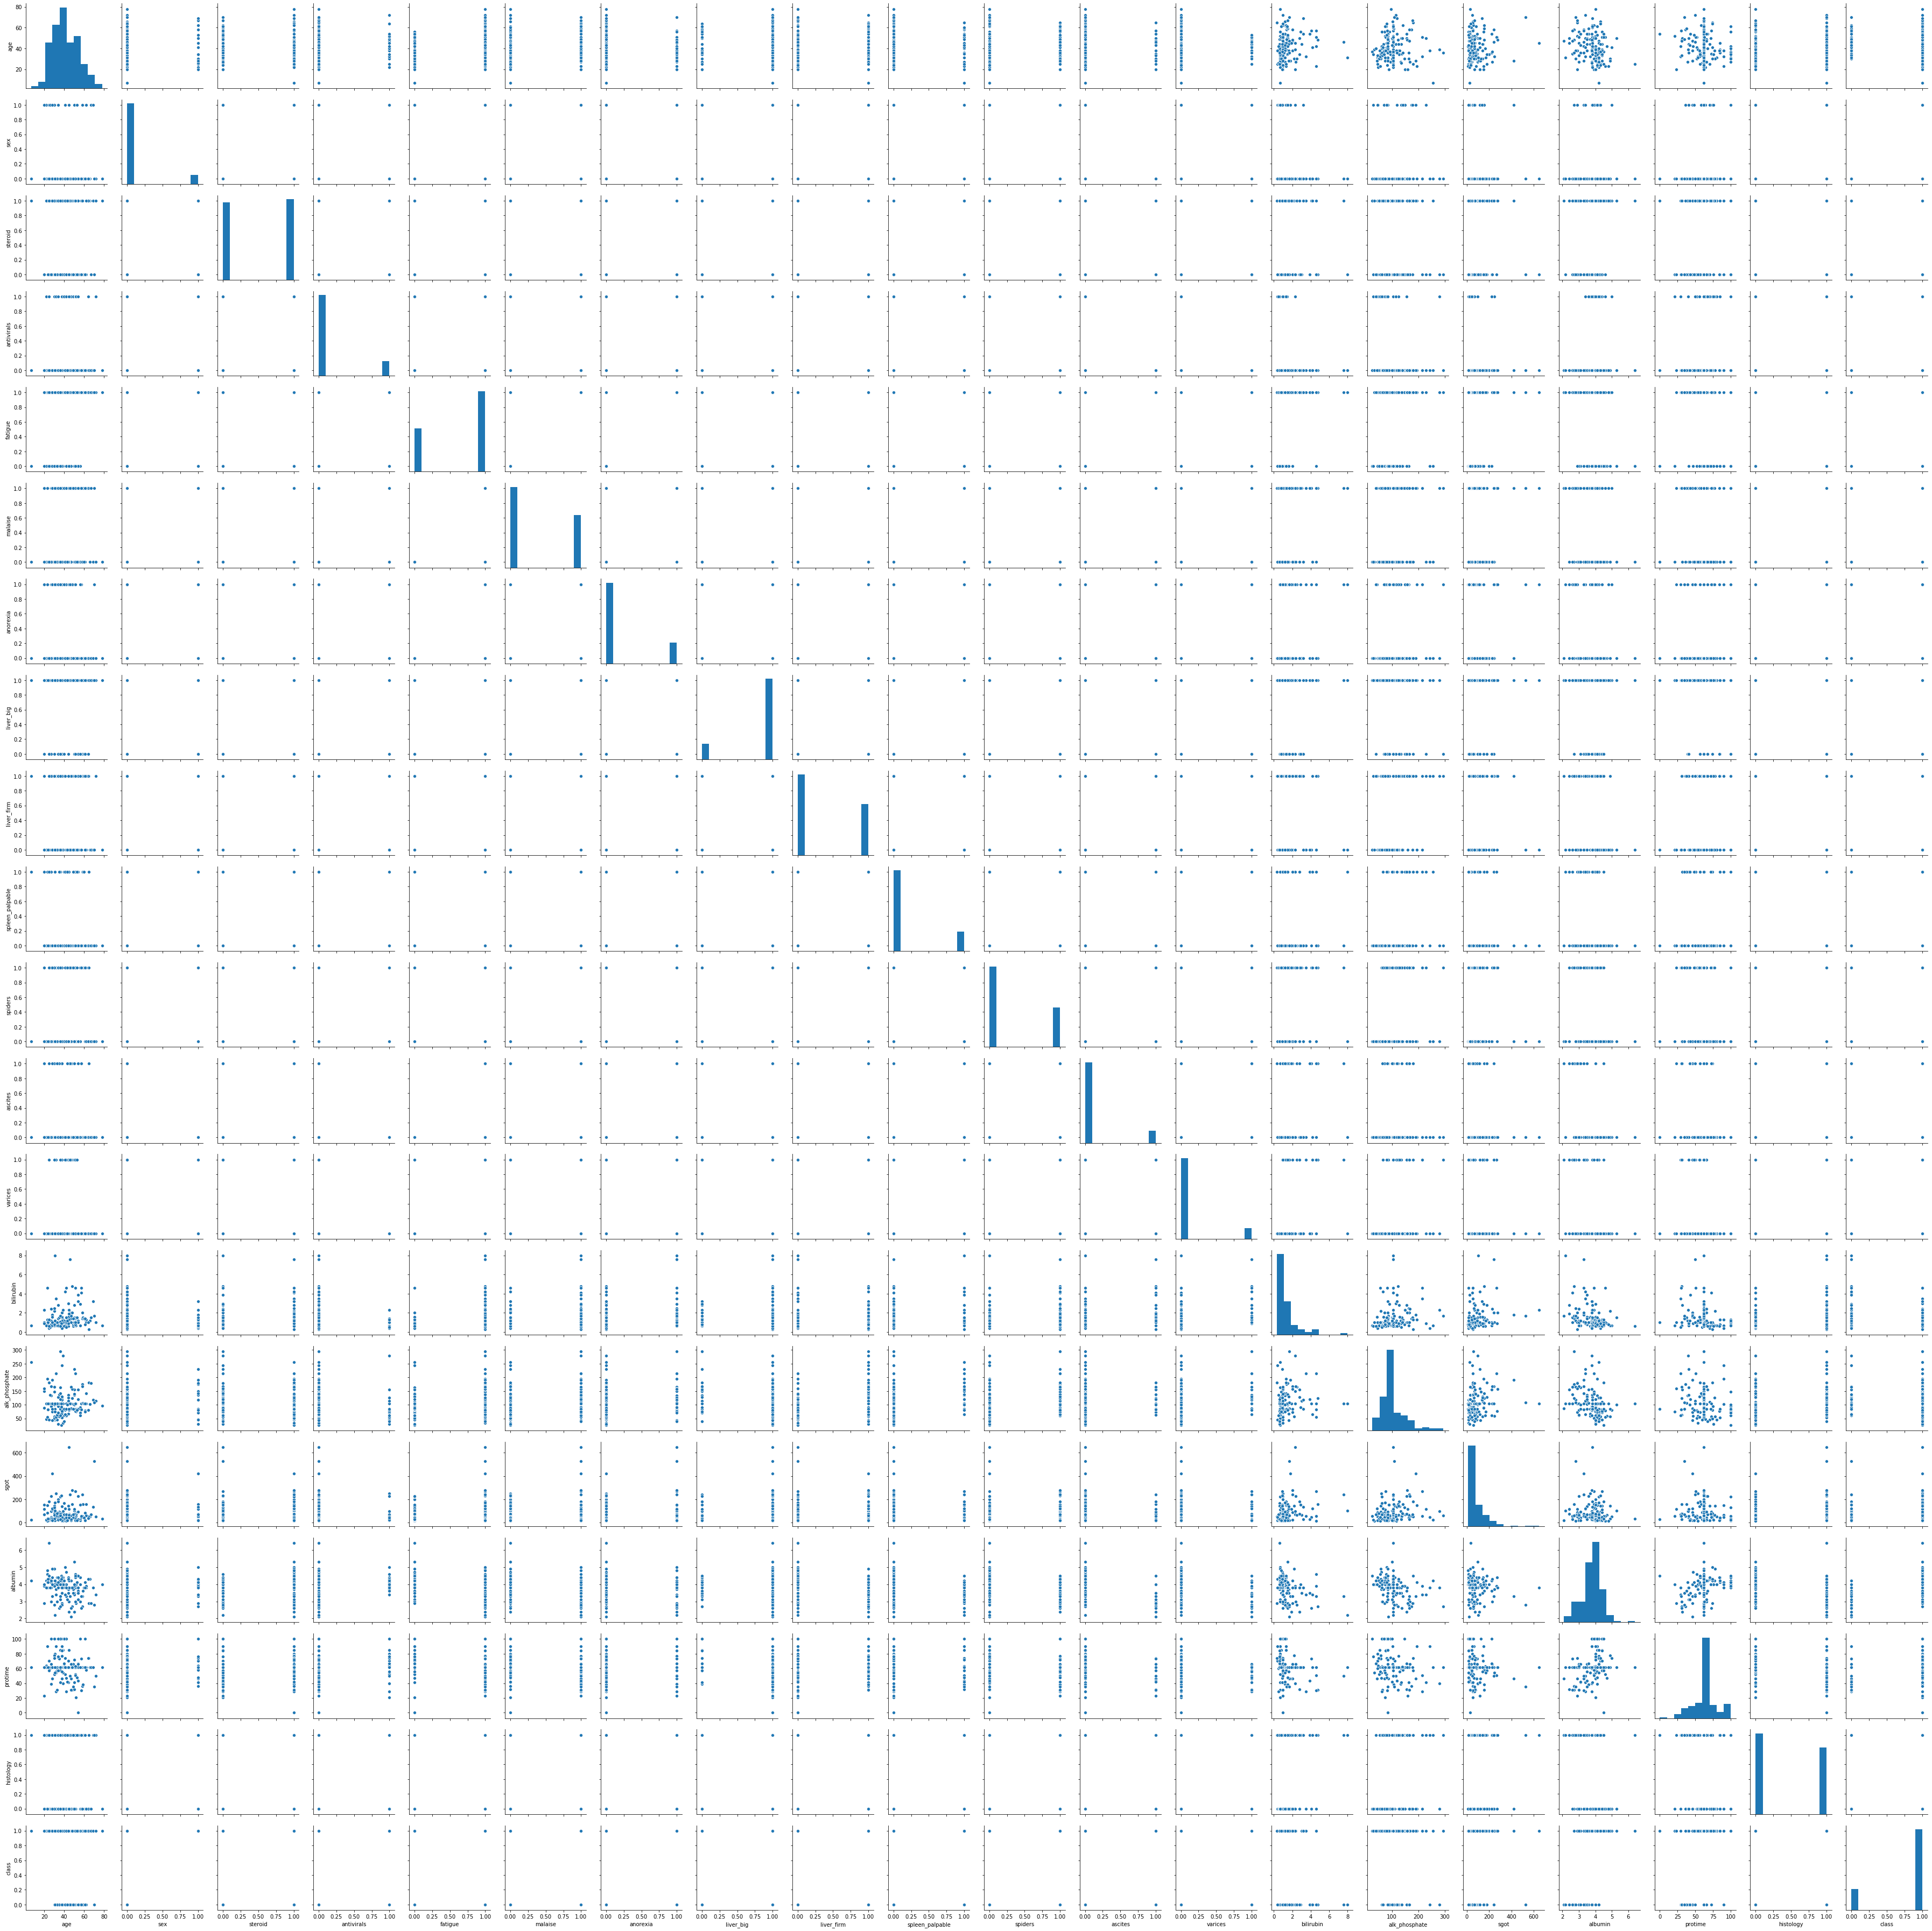

In [102]:
sns.pairplot(data)

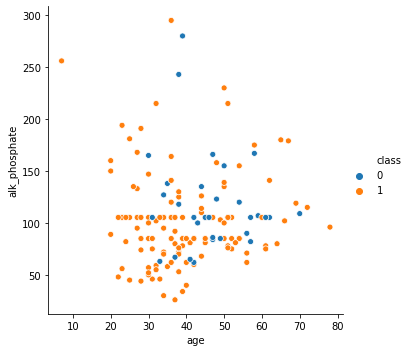

In [104]:
#relationship plot between the data
sns.relplot(x='age', y ='alk_phosphate', hue = 'class', data = data)

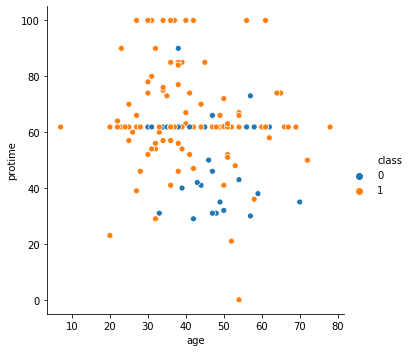

In [106]:
sns.relplot(x='age', y ='protime', hue = 'class', data = data)

#we can see this data is present more in 1

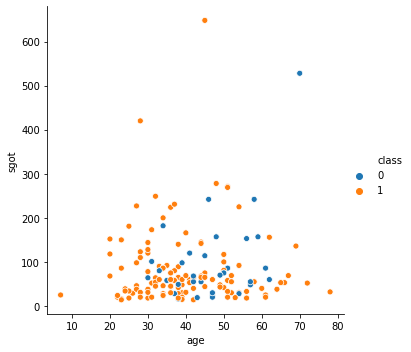

In [107]:
sns.relplot(x='age', y ='sgot', hue = 'class', data = data)

In [108]:
#from the above plots we can see the relationship between the variables with respect to different features.

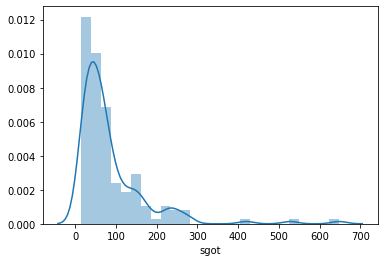

In [111]:
#distribution plot of variables

sns.distplot(data['sgot'])

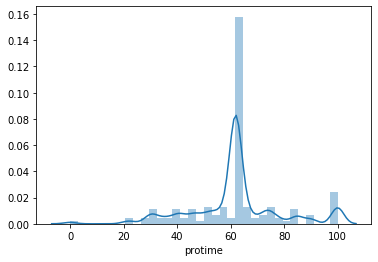

In [112]:

sns.distplot(data['protime'])

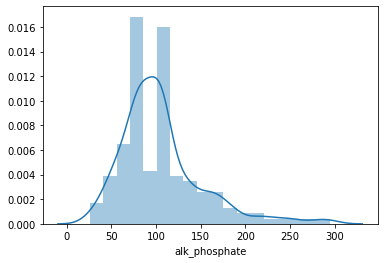

In [113]:

sns.distplot(data['alk_phosphate'])

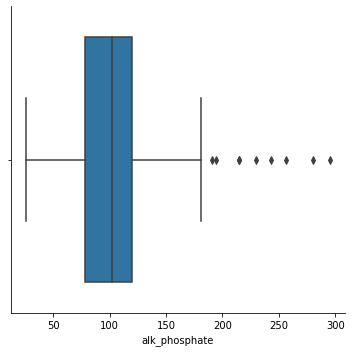

In [114]:
sns.catplot(x= 'alk_phosphate',kind = 'box',data =data )

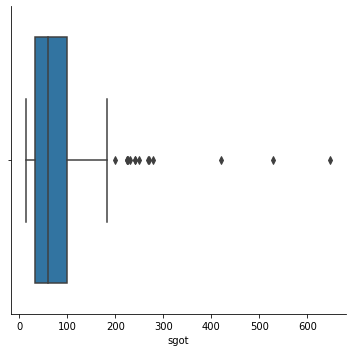

In [115]:
sns.catplot(x= 'sgot',kind = 'box',data =data )

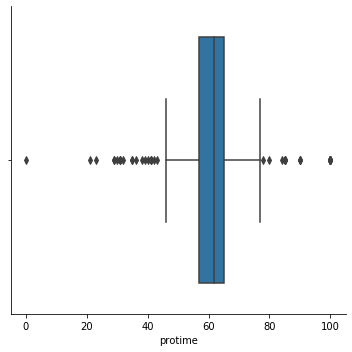

In [116]:
sns.catplot(x= 'protime',kind = 'box',data =data )

In [ ]:
#conclusion, we can see that the scatter plot to make some assumptions that they are spread over gender and agewise and class whether they live or not.
#As our dataset says that who is having bilirubin value is high and age is also above 50 they have less chance to survive.